In [28]:
import pandas as pd
import numpy as np
from sklearn import *

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [30]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [31]:
pd.Series(y).value_counts()/len(y)

0    0.7
1    0.3
dtype: float64

In [32]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy() # features ... label is not included
del X[target]
X = pd.get_dummies(X, drop_first=True) # handle catergorical variables ... one hot encoding

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 1)

In [16]:
pd.Series(y_train).value_counts()#/len(y_train)

0    486
1    214
dtype: int64

In [18]:
p1 = 214/700
g = 2 * p1 * (1-p1)
g

0.4245061224489796

In [20]:
b1 = y_train[X_train.personal_status_female>0.5]
b2 = y_train[X_train.personal_status_female<=0.5]

In [22]:
pd.Series(b1).value_counts()/len(b1)

0    0.635135
1    0.364865
dtype: float64

In [23]:
pd.Series(b2).value_counts()/len(b2)


0    0.721757
1    0.278243
dtype: float64

In [24]:
g_b1 = 2 * 0.364865 * (1 - 0.364865)
g_b1

0.46347706355

In [25]:
g_b2 = 2 * 0.278243 * (1 - 0.278243)
g_b2

0.401647665902

In [26]:
g_avg = (g_b1 + g_b2)/2

In [27]:
info_gain = g - (g_avg)
info_gain

-0.008056242277020398

accuracy 0.7566666666666667 
precision 0.6 
recall 0.45348837209302323


(<matplotlib.figure.Figure at 0x10b5347f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e54f630>)

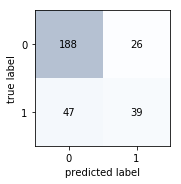

In [33]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy() # features ... label is not included
del X[target]
X = pd.get_dummies(X, drop_first=True) # handle catergorical variables ... one hot encoding

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
                                      
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_test_pred),
"\nprecision", metrics.precision_score(y_test, y_test_pred),
"\nrecall", metrics.recall_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

accuracy 0.7333333333333333 
precision 0.5576923076923077 
recall 0.3372093023255814


(<matplotlib.figure.Figure at 0x10e95c6a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e9b5c18>)

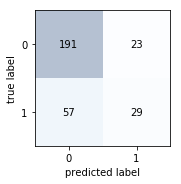

In [44]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy() # features ... label is not included
del X[target]
X = pd.get_dummies(X, drop_first=True) # handle catergorical variables ... one hot encoding

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])
                                      
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_test_pred),
"\nprecision", metrics.precision_score(y_test, y_test_pred),
"\nrecall", metrics.recall_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [45]:
cls1 = pipe.steps[-1][-1]
cls1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
from sklearn.tree import export_graphviz
export_graphviz(cls1, out_file = "tree.dot", feature_names = X.columns, filled=True)

In [47]:
!dot -Tpng tree.dot -o tree.png

In [48]:
!ls -l

total 1648
-rw-r--r--  1 abulbasar  staff  123822 Jun 19 12:05 Day 1 - 01 Pandas.ipynb
-rw-r--r--  1 abulbasar  staff  198943 Jun 19 16:39 Day 1 - 02 Visualization.ipynb
-rw-r--r--  1 abulbasar  staff   40601 Jun 20 12:04 Day 1 - 03 linear regression.ipynb
-rw-r--r--  1 abulbasar  staff   63044 Jun 20 16:56 Day 2 - classification model.ipynb
-rw-r--r--  1 abulbasar  staff   88978 Jun 20 15:37 Day 2 - kaggle house price.ipynb
-rw-r--r--  1 abulbasar  staff   34298 Jun 21 14:14 Day 3 - Credit default (Decision tree).ipynb
-rw-r--r--  1 abulbasar  staff   43779 Jun 21 11:24 Day 3 - Logistic Regression using Numpy.ipynb
-rw-r--r--  1 abulbasar  staff   31888 Jun 21 10:20 Day 3 - credit card fraud.ipynb
-rw-r--r--  1 abulbasar  staff    1195 Jun 20 10:07 model.pickle
-rw-r--r--  1 abulbasar  staff    1736 Jun 21 14:15 tree.dot
-rw-r--r--  1 abulbasar  staff  149977 Jun 21 14:15 tree.png


accuracy 0.76 
precision 0.6346153846153846 
recall 0.38372093023255816


(<matplotlib.figure.Figure at 0x10eaa7a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ea94438>)

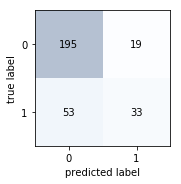

In [50]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy() # features ... label is not included
del X[target]
X = pd.get_dummies(X, drop_first=True) # handle catergorical variables ... one hot encoding

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=10))
])
                                      
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_test_pred),
"\nprecision", metrics.precision_score(y_test, y_test_pred),
"\nrecall", metrics.recall_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))